# Closed Vocabulary Analysis

### Import Packages

In [10]:
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Read in data

In [2]:
awards_data = pd.read_csv("awards_data_noboiler.csv")

### List of Banned Words

Got the list from this link: https://www.nytimes.com/interactive/2025/03/07/us/trump-federal-agencies-websites-words-dei.html

In [3]:
banned_words = [
#A
    "accessible", "activism", "activists", "advocacy", "advocate", "advocates", "affirming care", "all-inclusive",
    "allyship", "anti-racism", "antiracist", "assigned at birth", "assigned female at birth", "assigned male at birth",
    "at risk", 
#B
    "barrier", "barriers", "belong", "bias", "biased", "biased toward", "biases", "biases towards",
    "biologically female", "biologically male", "BIPOC", "Black", "breastfeed + people", "breastfeed + person",
#C
    "chestfeed + people", "chestfeed + person", "clean energy", "climate crisis", "climate science",
    "commercial sex worker", "community diversity", "community equity", "confirmation bias", "cultural competence",
    "cultural differences", "cultural heritage", "cultural sensitivity", "culturally appropriate", "culturally responsive",
#D
    "DEI", "DEIA", "DEIAB", "DEIJ", "disabilities", "disability", "discriminated", "discrimination", "discriminatory",
    "disparity", "diverse", "diverse backgrounds", "diverse communities", "diverse community", "diverse group",
    "diverse groups", "diversified", "diversify", "diversifying", "diversity", 
#E    
    "enhance the diversity",
    "enhancing diversity", "environmental quality", "equal opportunity", "equality", "equitable", "equitableness", "equity",
    "ethnicity", "excluded", "exclusion", "expression", 
#F    
    "female", "females", "feminism", "fostering inclusivity", 
#G    
    "GBV", "gender", "gender based", "gender based violence", "gender diversity", "gender identity", "gender ideology",
    "gender-affirming care", "genders", "Gulf of Mexico",
#H    
    "hate speech", "health disparity", "health equity",
    "hispanic minority", "historically", 
#I    
    "identity", "immigrants", "implicit bias", "implicit biases", "inclusion",
    "inclusive", "inclusive leadership", "inclusiveness", "inclusivity", "increase diversity", "increase the diversity",
    "indigenous community", "inequalities", "inequality", "inequitable", "inequities", "inequity", "injustice",
    "institutional", "intersectional", "intersectionality", 
    
    "key groups", "key people", "key populations", 
    
    "Latinx", "LGBT", "LGBTQ", "marginalize", 
    
    "marginalized", "men who have sex with men", "mental health", "minorities", "minority",
    "most risk", "MSM", "multicultural", "Mx",
    
    "Native American", "non-binary", "nonbinary", "oppression", "oppressive",
    "orientation", "people + uterus", "people-centered care", "person-centered", "person-centered care", "polarization",
    "political", "pollution", "pregnant people", "pregnant person", "pregnant persons", "prejudice", "privilege",
    "privileges", "promote diversity", "promoting diversity", "pronoun", "pronouns", "prostitute", 
    
    "race", "race and ethnicity", "racial", "racial diversity", "racial identity", "racial inequality", "racial justice",
    "racially", "racism",
    
    "segregation", "sense of belonging", "sex", "sexual preferences", "sexuality", "social justice",
    "sociocultural", "socioeconomic", "status", "stereotype", "stereotypes", "systemic", "systemically", 
    
    "they/them",  "trans", "transgender", "transsexual", "trauma", "traumatic", "tribal", 
    
    "unconscious bias", "underappreciated", "underprivileged", "underrepresentation", "underrepresented", "underserved", "undervalued", 
    
    "victim", "victims", "vulnerable populations", 

    "women", "women and underrepresented"
]


In [5]:
# Preprocess: lowercase the Abstracts for case-insensitive matching
awards_data['Abstract_clean'] = awards_data['Abstract'].str.lower()

# Group data by year
grouped = awards_data.groupby('Year')['Abstract_clean'].apply(lambda x: ' '.join(x)).reset_index()

# Create a DataFrame to store results
results = defaultdict(list)

# Count occurrences per banned word per year
for _, row in grouped.iterrows():
    year = row['Year']
    text = row['Abstract_clean']
    for word in banned_words:
        # Clean the word for regex (e.g. handle special characters like "+")
        word_escaped = re.escape(word.lower())
        count = len(re.findall(r'\b' + word_escaped + r'\b', text))
        results['Year'].append(year)
        results['Word'].append(word)
        results['Count'].append(count)

# Create final DataFrame
banned_counts_df = pd.DataFrame(results)

# Pivot the table for easier visualization (optional)
pivot_table = banned_counts_df.pivot(index='Word', columns='Year', values='Count').fillna(0).astype(int)

Year,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Word,,,,,,,,,,
BIPOC,0,0,0,0,0,4,8,6,0,0
Black,28,48,32,53,69,98,96,71,65,29
DEI,0,0,0,2,0,37,21,28,8,0
DEIA,0,0,0,0,0,0,0,0,2,0
DEIAB,0,0,0,0,0,0,0,0,0,0


In [7]:
# Temporarily display all rows
pd.set_option('display.max_rows', None)

# View the full table
display(pivot_table)

Year,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Word,,,,,,,,,,
BIPOC,0,0,0,0,0,4,8,6,0,0
Black,28,48,32,53,69,98,96,71,65,29
DEI,0,0,0,2,0,37,21,28,8,0
DEIA,0,0,0,0,0,0,0,0,2,0
DEIAB,0,0,0,0,0,0,0,0,0,0
DEIJ,0,0,0,0,0,0,0,4,0,0
GBV,0,0,0,0,0,0,0,0,0,0
Gulf of Mexico,5,9,28,12,12,5,7,12,0,0
LGBT,0,0,0,1,0,0,0,0,2,0


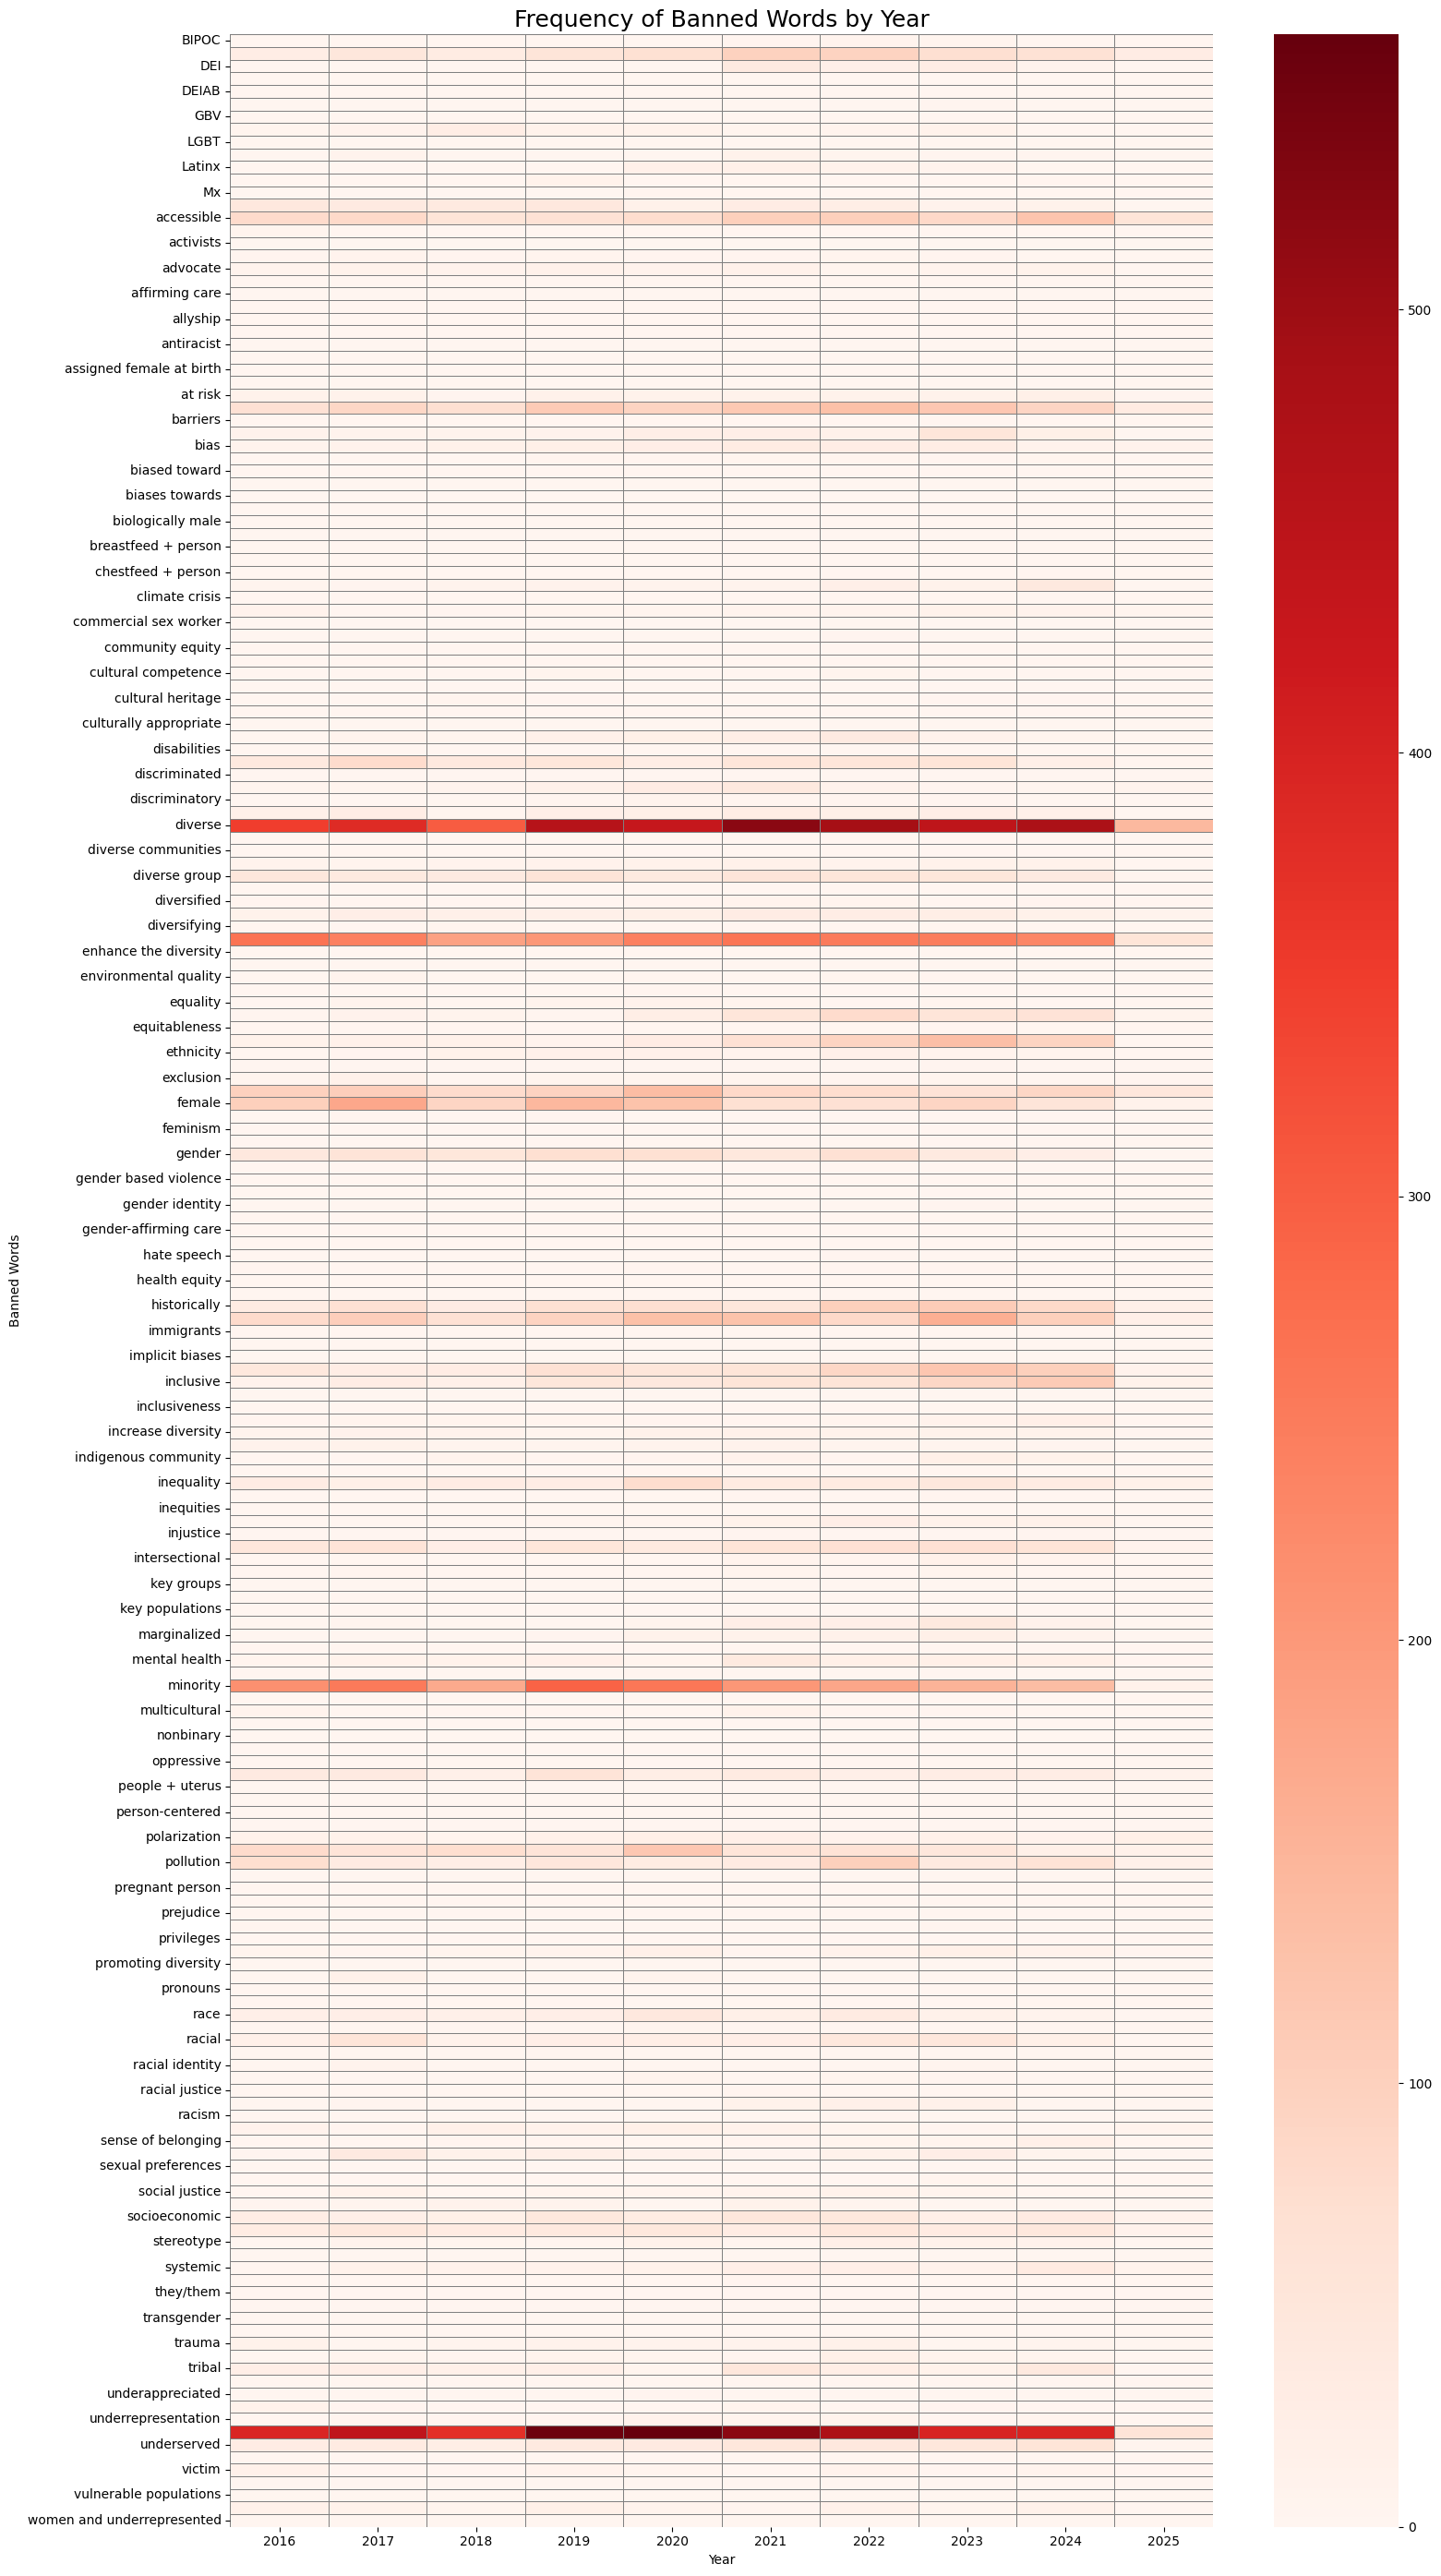

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 28))  # Adjust height for 197 rows
sns.heatmap(pivot_table, cmap="Reds", linewidths=0.5, linecolor='gray')

plt.title("Frequency of Banned Words by Year", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Banned Words")
plt.tight_layout()
plt.show()

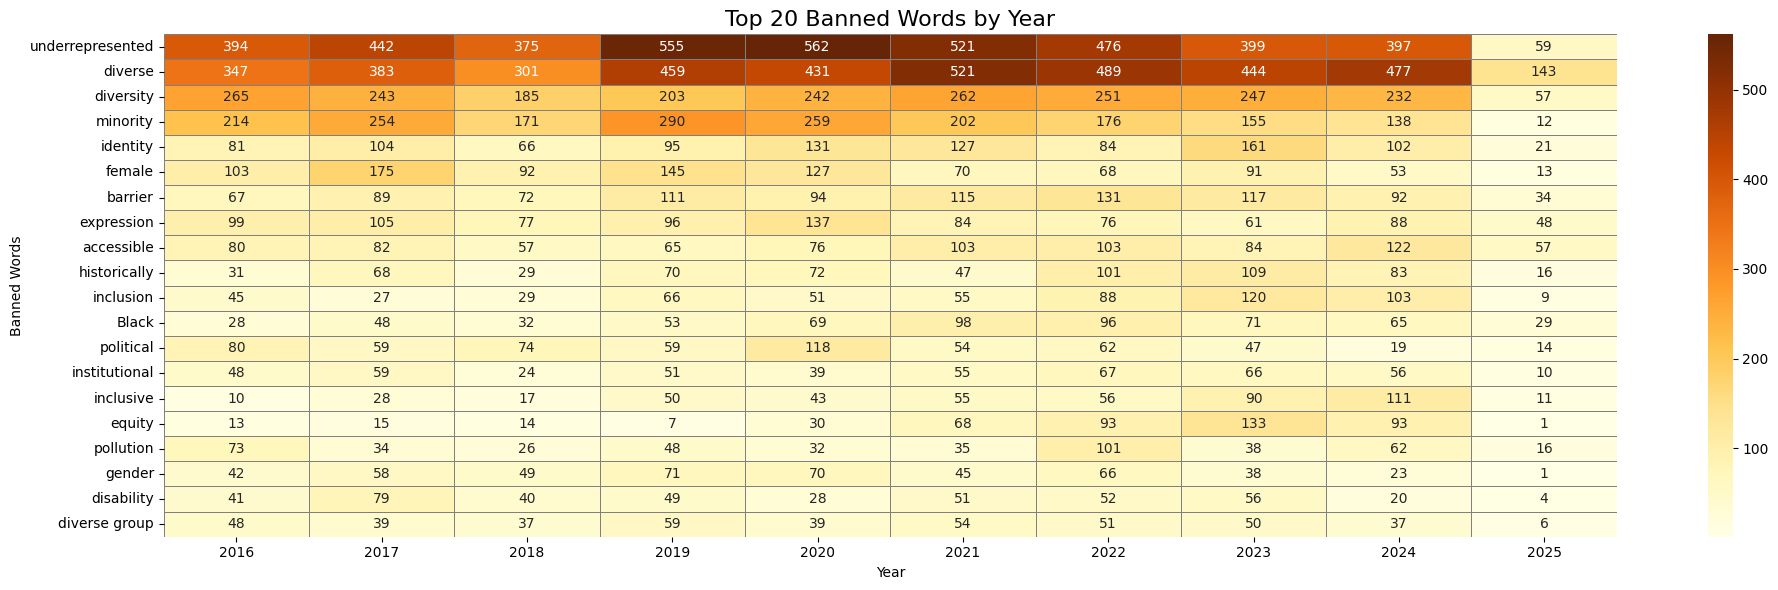

In [20]:

# Get the top 20 most frequent words (by total across all years)
top_20_words = pivot_table.sum(axis=1).sort_values(ascending=False).head(20).index

# Subset the pivot table to just those words
pivot_top20 = pivot_table.loc[top_20_words]

# Plot the heatmap
plt.figure(figsize=(20, 6))  # Width for years, height for 12 rows
sns.heatmap(pivot_top20, cmap="YlOrBr", linewidths=0.5, linecolor='gray', annot=True, fmt='d')
plt.title("Top 20 Banned Words by Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Banned Words")
plt.tight_layout()
plt.show()

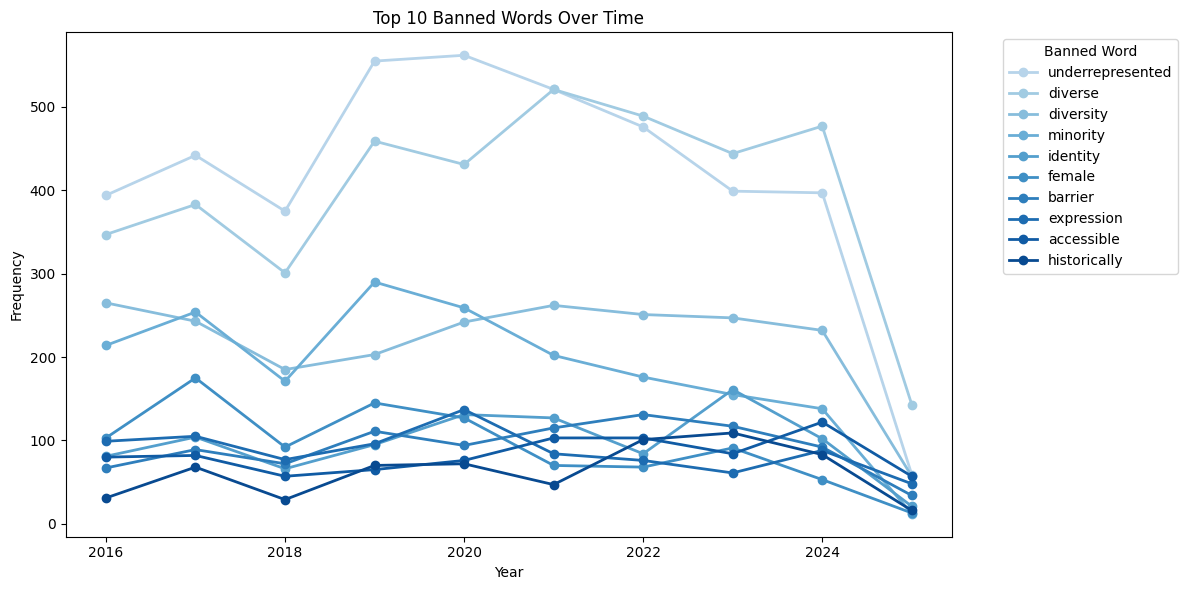

In [11]:
# Get top 10 most frequent banned words overall
top_words = pivot_table.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top = pivot_table.loc[top_words]

# Choose a colormap (can also try "coolwarm", "cividis", "Greys", "Purples", etc.)
cmap = plt.cm.Blues

# Generate N colors from the colormap
colors = cmap(np.linspace(0.3, 0.9, pivot_top.shape[0]))  # avoid very light or very dark

# Plot with custom colors
ax = pivot_top.T.plot(figsize=(12, 6), marker='o', color=colors, linewidth=2)

plt.title("Top 10 Banned Words Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Banned Word", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

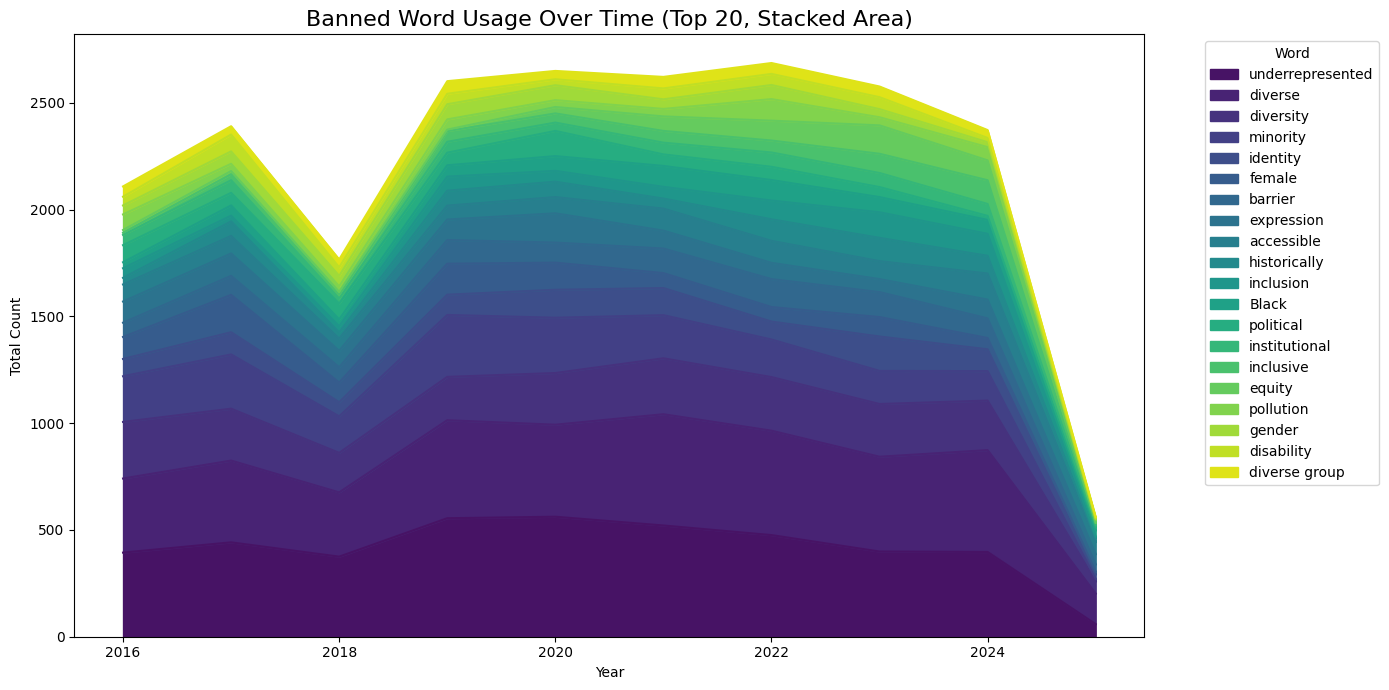

In [24]:
# Get top 20 banned words
top_20_words = pivot_table.sum(axis=1).sort_values(ascending=False).head(20).index
pivot_top20 = pivot_table.loc[top_20_words]

# Choose a cohesive colormap (viridis is smooth and colorblind-friendly)
colors = sns.color_palette("viridis", n_colors=20)

# Plot
pivot_top20.T.plot.area(figsize=(14, 7), color=colors)

plt.title("Banned Word Usage Over Time (Top 20, Stacked Area)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.legend(title="Word", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()